For my project, I decided to use the baseball data provided by [Sean Lahman's baseball statistic website](http://www.seanlahman.com/baseball-archive/statistics/) to answer the following two questions. The latest archive files have been updated to 2016 season, and not 2014 as written in the project description.

1. Are there any corrrelation between team salaries and total wins?
2. What are the average age, height and weight and their distributions for all-star players?

---


### 1. Are there any corrrelation between team salaries and total wins?

To answer this, I needed to use the Salaries.csv for salaries and Teams.csv for the wins for the teams.  Salary data has player salary and the team they were on since 1985, and the Team data has annual number of wins for the team since 1871.  

First I wanted to check and understand the salary data, because there wasn't a description of what the data it is.  I was not sure whether the roster was from the beginning of the year, from all players that played for a team during that year, or from the end of the year.  Preferably, it is from the beginning or end of the year, which would show same number of players from the team.  If teams had different number of players, it would not be fair to compare teams with more players versus less players. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%pylab inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
salaries_df = pd.read_csv('Salaries.csv')
salaries_df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


*Looking at the total players in each team for 2016 season.*

In [4]:
print salaries_df[salaries_df.yearID==2016].groupby('teamID').count()

        yearID  lgID  playerID  salary
teamID                                
ARI         26    26        26      26
ATL         29    29        29      29
BAL         29    29        29      29
BOS         29    29        29      29
CHC         29    29        29      29
CHW         25    25        25      25
CIN         29    29        29      29
CLE         27    27        27      27
COL         33    33        33      33
DET         31    31        31      31
HOU         28    28        28      28
KCR         29    29        29      29
LAA         26    26        26      26
LAD         35    35        35      35
MIA         28    28        28      28
MIL         30    30        30      30
MIN         24    24        24      24
NYM         27    27        27      27
NYY         29    29        29      29
OAK         30    30        30      30
PHI         29    29        29      29
PIT         28    28        28      28
SDP         27    27        27      27
SEA         28    28     

Unfortunately, teams have different number of players on the team, which can result in unfair comparisons.  I decided to investigate further on the difference in the number of players for each team.  **The difference is due to each team having option to put players on the disabled list, and the roster is from the beginning of the season.**  I came to this conclusion by checking the team roster on the Salaries.csv to the published opening day team roster for several teams, and they matched.

For example, the Dodgers have 35 players on the beginning of the season roster, but this includes 10 players on the disabled list.  On the other hand, Twins has 24 players, or one less than the 25-player on an opening day roster. This may be due to having an internation player (Byong Ho Park) on a team whose contract may not have finalized by the list was made.

Overall, I was satisfied that the salary data is a good representation of the beginning of the season roster for each team since teams still have to pay players on the disabled list.  With that, I decided to continue on with the correlation analysis.

Next, I read the Teams.csv data.

In [5]:
teams_df = pd.read_csv('Teams.csv')
#teams_df = teams_df[teams_df.yearID >= 1985]
teams_df.head(3)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1


*Checking for missing values*

Next, I checked whether the "salary" column in salary_df and "W" column in teams_df have any missing values.

In [6]:
def number_of_NaN(df, colname):

    num_missing = len(df[colname]) - df[colname].count()

    print 'num of rows: ', len(df[colname])
    print 'num of values: ',df[colname].count()
    print 'num of missing values: ', num_missing

    return num_missing

In [7]:
number_of_NaN(salaries_df,'salary')

num of rows:  26428
num of values:  26428
num of missing values:  0


0

In [8]:
number_of_NaN(teams_df,'W')

num of rows:  2835
num of values:  2835
num of missing values:  0


0

Since there are no missing values, I continued on with the analysis by first merging the teams_df and salaries_df.

In [9]:
def merge_team_and_salaries():
    
    a = teams_df[['yearID','teamID','W']]
    b = salaries_df.groupby(['yearID','teamID'], as_index=False).sum()
    #print a
    #print b
    df_merged = a.merge(b, on=['yearID','teamID'], how='inner')

    #print df_merged.groupby('yearID').count()
    return df_merged

salaries_vs_win_data = merge_team_and_salaries()

salaries_vs_win_data.groupby('yearID').count()

,teamID,W,salary
yearID,,,
1985,26,26,26
1986,26,26,26
1987,26,26,26
1988,26,26,26
1989,26,26,26
1990,26,26,26
1991,26,26,26
1992,26,26,26
1993,28,28,28


Looking at the count of merged data by 'yearID', there is a sharp drop off in number of teams in 2016 to 19 teams.  I perused the teams and salaries data and discovered that some of the 'teamID' in salaries_df was changed in 2016 while the 'teamID' in teams_df did not change.  I manually fixed the salaries_df to make the data consistent.

In [10]:
def fix_salaries_df_teamid():
    salaries_df.loc[((salaries_df.yearID==2016) & (salaries_df.teamID=='CHW')),'teamID']='CHA'
    salaries_df.loc[((salaries_df.yearID==2016) & (salaries_df.teamID=='CHC')),'teamID']='CHN'
    salaries_df.loc[((salaries_df.yearID==2016) & (salaries_df.teamID=='KCR')),'teamID']='KCA'
    salaries_df.loc[((salaries_df.yearID==2016) & (salaries_df.teamID=='LAD')),'teamID']='LAN'
    salaries_df.loc[((salaries_df.yearID==2016) & (salaries_df.teamID=='NYY')),'teamID']='NYA'
    salaries_df.loc[((salaries_df.yearID==2016) & (salaries_df.teamID=='NYM')),'teamID']='NYN'
    salaries_df.loc[((salaries_df.yearID==2016) & (salaries_df.teamID=='SDP')),'teamID']='SDN'
    salaries_df.loc[((salaries_df.yearID==2016) & (salaries_df.teamID=='SFG')),'teamID']='SFN'
    salaries_df.loc[((salaries_df.yearID==2016) & (salaries_df.teamID=='STL')),'teamID']='SLN'
    salaries_df.loc[((salaries_df.yearID==2016) & (salaries_df.teamID=='TBR')),'teamID']='TBA'
    salaries_df.loc[((salaries_df.yearID==2016) & (salaries_df.teamID=='WSN')),'teamID']='WAS'
    return None

In [11]:
fix_salaries_df_teamid()
salaries_vs_win_data = merge_team_and_salaries()
salaries_vs_win_data[salaries_vs_win_data.yearID>2010].groupby('yearID').count()

,teamID,W,salary
yearID,,,
2011,30,30,30
2012,30,30,30
2013,30,30,30
2014,30,30,30
2015,30,30,30
2016,30,30,30


With the data cleaned, I ran correlations of team salary vs number of wins over the years.

In [12]:
def compute_correl(df, col1, col2, grp=None):
    # if grp is not passed, compute correlations on col1 and col2 in dataframe df
    # return a list of one list with 'All" as a key value
    # if grp is passed, run multiple runs of correlation grouped by grp
    # return a list of lists with grp as key values
    
    correl_data = []
    
    if grp==None:
        correl_data.append(['All',df[col1].corr(df[col2], method='pearson')])
    else:
        for name, group in df.groupby(grp):
            tmp = np.corrcoef(group[col1], group[col2])[0,1]
            correl_data.append([name, tmp])
                
    return correl_data    

In [13]:
salary_win_corr = compute_correl(salaries_vs_win_data, 'salary', 'W', 'yearID')

To visually look at the change in the correlation of salaries and wins, I plotted a line graph.

In [14]:
def plot_single_line(x_list, y_list, ptitle, pxlabel, pylabel):
    # x_list = x-axis values, y_list = y-axis values
    # ptitle = title, pxlabel = xlabel, pylabel = ylabel
    
    plt.plot(y_list,x_list)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)

    return None

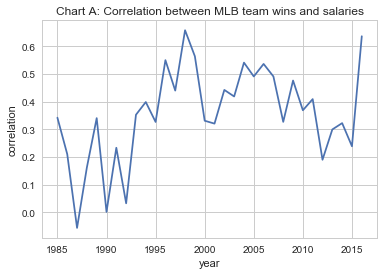

In [15]:
x_val = [data[1] for data in salary_win_corr]
y_val = [data[0] for data in salary_win_corr]

plot_single_line(x_val, y_val,'Chart A: Correlation between MLB team wins and salaries',
                 'year','correlation')

I also plotted the mean, max and min values of salaries and wins to see the trends of those variables.

In [16]:
def plot_groupby_mean_max_min(datalist, grp, colname, ptitle, pxlabel, pylabel):

    # plot the mean, max and min of datalist grouped by grp for column colname
    # datalist has data
    # grp is the field to groupby
    # colname is the field to chart
    # ptitle is the plot title
    # pxlabel is the plot xlabel
    # pylabel is the plot ylabel
    
    datalist_group = datalist.groupby(grp)
    data_mean = datalist_group[colname].mean()
    data_max = datalist_group[colname].max()
    data_min = datalist_group[colname].min()
    
    plt.plot(data_mean, label='mean')
    plt.plot(data_max, label='max')
    plt.plot(data_min, label='min')
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)
    
    plt.legend(loc='upper left')
    
    return None

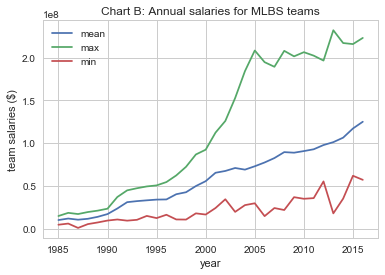

In [17]:
plot_groupby_mean_max_min(salaries_vs_win_data, 'yearID', 'salary', 
                         'Chart B: Annual salaries for MLBS teams', 'year',
                         'team salaries ($)')

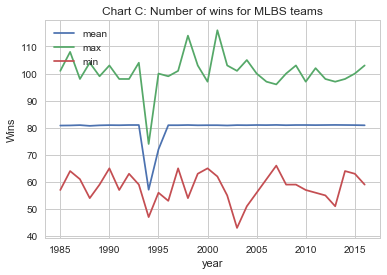

In [18]:
plot_groupby_mean_max_min(salaries_vs_win_data, 'yearID', 'W',
                         'Chart C: Number of wins for MLBS teams', 'year',
                         'Wins')


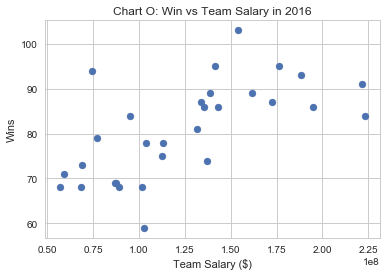

In [23]:
plt.scatter(salaries_vs_win_data[salaries_vs_win_data.yearID==2016]['salary'],
            salaries_vs_win_data[salaries_vs_win_data.yearID==2016]['W'])
plt.xlabel('Team Salary ($)')
plt.ylabel('Wins')
plt.title('Chart O: Win vs Team Salary in 2016')

**CONCLUSION FOR QUESTION 1**

Team salary and win total are positively correlated with correlation being higher from 1993 to 2016 than from 1985 to 1992 (Chart A).  Correlation ranged between -0.05 to 0.35 from 1985 to 1992, which imply that there were very small positive correlation, if any.  Salary and win correlation were much higher over the next 18years, from 1993 to 2011, as they ranged from 0.35 to 0.67.  They dropped to around 0.25 from 2012 to 2015, before jumping to 0.65 in 2016.  There seems to be positive correlation between the two variables, especially after 1993.

Looking at the scatterplot of wins versus team salary of 2016 season shows the strong positive correlation (Chart O).  All eight teams that spend more than \$150 million in team salary won at least 83 games for the season.  On the other hand, twelve out of fourteen teams with salary less than \$125 million won less than 80 games.  However, since the correlation does not imply causation, I cannot conclude that teams spending more salary will likely to win more games.  While controlled experiment could help answer the causation, it is difficult to set up as the league will not accept to do an experiment.  

Another limitation of the data is that the team salary is the beginning of the year total.  Teams add and drop players throughout the season, so the beginning team salaries could vastly differ from the in-season and ending team salaries.

Looking at the annual salary chart (Chart B), average team salaries has ballooned from \$10 million in 1985 to \$125 million in 2016.  Maximum team salary has broken \$200 million mark in 2005 and has been around \$220 million from 2013 to 2016.

Annual team wins have been averaging around 81 games, except for the strike-shortened season of 1994 and 1995 (Chart C).  This makes sense because there are 162 games per team a year, minus a small number of cancelled games that are not made up.  Removing the strike-shortened seasons, maximum team wins have ranged from 96 wins to 116 wins while the minumum team wins have ranged from 43 wins to 66 wins.



---


### 2. What are the average age, height and weight and their distributions for all-star players?

To answer this, I needed to use the Masters.csv which has the player information including age, height and weight as well as AllStarFull.csv which has the all-star rosters since 1933.  To remain consistent with the above analysis, I will keep only look at the all-star games since 1985.  Also, the spreadsheets only provide single height and weight for the players.  While the height and the weight fluctuate over the course of their career, we will assume that they are fairly steady and assume to be a single value.

First, let's import the data and merge them to do analysis.

In [18]:
master_df = pd.read_csv('Master.csv')
master_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [19]:
allstarfull_df = pd.read_csv('AllstarFull.csv')
allstarfull_df.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0


In [20]:
allstar_df = allstarfull_df.merge(master_df, on=['playerID'], how='inner')
allstar_df.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos,birthYear,birthMonth,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0,1908.0,11.0,...,Gomez,Vernon Louis,173.0,74.0,L,L,1930-04-29,1943-05-30,gomel102,gomezle01
1,gomezle01,1934,0,NLS193407100,NYA,AL,1.0,1.0,1908.0,11.0,...,Gomez,Vernon Louis,173.0,74.0,L,L,1930-04-29,1943-05-30,gomel102,gomezle01
2,gomezle01,1935,0,ALS193507080,NYA,AL,1.0,1.0,1908.0,11.0,...,Gomez,Vernon Louis,173.0,74.0,L,L,1930-04-29,1943-05-30,gomel102,gomezle01
3,gomezle01,1936,0,NLS193607070,NYA,AL,0.0,NaN,1908.0,11.0,...,Gomez,Vernon Louis,173.0,74.0,L,L,1930-04-29,1943-05-30,gomel102,gomezle01
4,gomezle01,1937,0,ALS193707070,NYA,AL,1.0,1.0,1908.0,11.0,...,Gomez,Vernon Louis,173.0,74.0,L,L,1930-04-29,1943-05-30,gomel102,gomezle01


*Checking for missing values*

Next, I checked whether the "birthYear", "birthMonth", "birthDay", "weight" and "height" columns have any missing value.  I will utilize the function that was created earlier to run these.

In [21]:
number_of_NaN(allstar_df,'birthYear')

num of rows:  5148
num of values:  5148
num of missing values:  0


0

In [22]:
number_of_NaN(allstar_df,'birthMonth')

num of rows:  5148
num of values:  5148
num of missing values:  0


0

In [23]:
number_of_NaN(allstar_df,'birthDay')

num of rows:  5148
num of values:  5148
num of missing values:  0


0

In [24]:
number_of_NaN(allstar_df,'weight')

num of rows:  5148
num of values:  5148
num of missing values:  0


0

In [25]:
number_of_NaN(allstar_df,'height')

num of rows:  5148
num of values:  5148
num of missing values:  0


0

Since there are no missing values, let's calculate the age of the players of their all-star season.  I used the [Wikipedia's List of Major League Baseball All-Star Games](https://en.wikipedia.org/wiki/List_of_Major_League_Baseball_All-Star_Games) to create asgDates.csv with year, month, and day of the historical all-star games.  I will merge this to the allstar_df.

In [26]:
asgDates_df = pd.read_csv('asgDates.csv')
asgDates_df.head()

,asgYear,asgMth,asgDay
0,1933,7,6
1,1934,7,10
2,1935,7,8
3,1936,7,7
4,1937,7,7


In [27]:
allstar_df = allstar_df.merge(asgDates_df, left_on=['yearID'], right_on=['asgYear'], how='inner')

In [28]:
allstar_df.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos,birthYear,birthMonth,...,height,bats,throws,debut,finalGame,retroID,bbrefID,asgYear,asgMth,asgDay
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0,1908.0,11.0,...,74.0,L,L,1930-04-29,1943-05-30,gomel102,gomezle01,1933,7,6
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0,1905.0,10.0,...,70.0,R,R,1929-04-19,1947-09-14,ferrr101,ferreri01,1933,7,6
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0,1903.0,6.0,...,72.0,L,L,1923-06-15,1939-04-30,gehrl101,gehrilo01,1933,7,6
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0,1903.0,5.0,...,71.0,L,R,1924-09-22,1942-09-27,gehrc101,gehrich01,1933,7,6
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0,1896.0,11.0,...,69.0,R,R,1918-05-06,1939-10-01,dykej101,dykesji01,1933,7,6


In [29]:
allstar_df.birthYear = allstar_df.birthYear.astype(int)
allstar_df.birthMonth = allstar_df.birthMonth.astype(int)
allstar_df.birthDay = allstar_df.birthDay.astype(int)
allstar_df.yearID = allstar_df.yearID.astype(int)

In [30]:
allstar_df['date_birth'] = allstar_df['birthYear'].astype(str) + '-' + allstar_df['birthMonth'].astype(str) + '-' + allstar_df['birthDay'].astype(str)
allstar_df['date_birth'] = pd.to_datetime(allstar_df['date_birth'])

In [31]:
allstar_df['date_as_game'] = allstar_df['yearID'].astype(str) + '-' + allstar_df['asgMth'].astype(str) + '-' + allstar_df['asgDay'].astype(str)
allstar_df['date_as_game'] = pd.to_datetime(allstar_df['date_as_game'])

In [32]:
allstar_df['age'] = (allstar_df['date_as_game'] - allstar_df['date_birth']) / np.timedelta64(1,'Y')

In [33]:
allstar_df.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos,birthYear,birthMonth,...,debut,finalGame,retroID,bbrefID,asgYear,asgMth,asgDay,date_birth,date_as_game,age
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0,1908,11,...,1930-04-29,1943-05-30,gomel102,gomezle01,1933,7,6,1908-11-26,1933-07-06,24.608308
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0,1905,10,...,1929-04-19,1947-09-14,ferrr101,ferreri01,1933,7,6,1905-10-12,1933-07-06,27.732260
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0,1903,6,...,1923-06-15,1939-04-30,gehrl101,gehrilo01,1933,7,6,1903-06-19,1933-07-06,30.048529
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0,1903,5,...,1924-09-22,1942-09-27,gehrc101,gehrich01,1933,7,6,1903-05-11,1933-07-06,30.155308
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0,1896,11,...,1918-05-06,1939-10-01,dykej101,dykesji01,1933,7,6,1896-11-10 00:00:00,1933-07-06,36.649623


First, I plotted the avg, max and min of the age, height and weight of all-star players over the years.

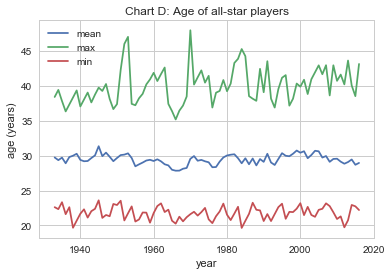

In [34]:
plot_groupby_mean_max_min(allstar_df, 'yearID', 'age', 
                         'Chart D: Age of all-star players', 'year',
                         'age (years)')

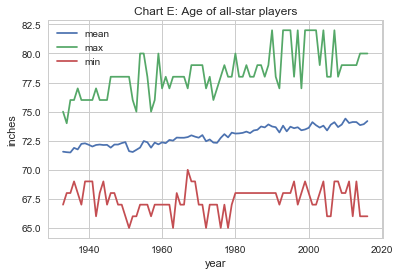

In [35]:
plot_groupby_mean_max_min(allstar_df, 'yearID', 'height', 
                         'Chart E: Age of all-star players', 'year',
                         'inches')

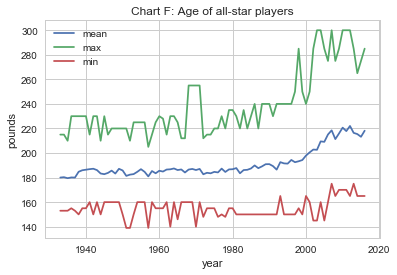

In [36]:
plot_groupby_mean_max_min(allstar_df, 'yearID', 'weight', 
                         'Chart F: Age of all-star players', 'year',
                         'pounds')

In [37]:
print allstar_df['age'].mean()
print allstar_df['height'].mean()
print allstar_df['weight'].mean()

29.4536650989
72.9262763299
191.929489468


It is interesting that while the average age of all-star players' ages have averaged consistently at around 29 years, heights and weights of the players have increased over the years.  For example, average age of all-star players in 1980 were 30 years old while they were 29 year old in 2016.  Meanwhile, average height increased from 73 inches to 74 inches and average weight jumped from 187 pounds to 218 pounds in the same period.

As I did some more work later on, I noticed that the trends were more visible on the plots if the max and the min are not included. This is because the line would be shown in a smaller range.  Below charts clearly show that the average age for all-stars have been fairly range-bound, while there are rising trends for heights and weights.

In [38]:
def plot_groupby_mean(datalist, grp, colname, ptitle, pxlabel, pylabel):

    # plot the mean of datalist grouped by grp for column colname
    # datalist has data
    # grp is the field to groupby
    # colname is the field to chart
    # ptitle is the plot title
    # pxlabel is the plot xlabel
    # pylabel is the plot ylabel
    
    datalist_group = datalist.groupby(grp)
    data_mean = datalist_group[colname].mean()
    
    plt.plot(data_mean, label='mean')
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)    
    plt.legend(loc='upper left')
    
    return None

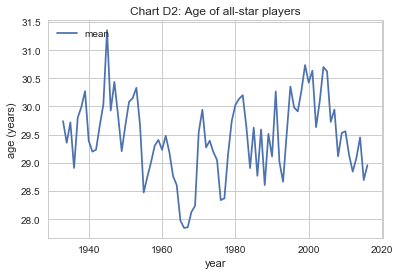

In [39]:
plot_groupby_mean(allstar_df, 'yearID', 'age', 
                  'Chart D2: Age of all-star players', 'year',
                  'age (years)')

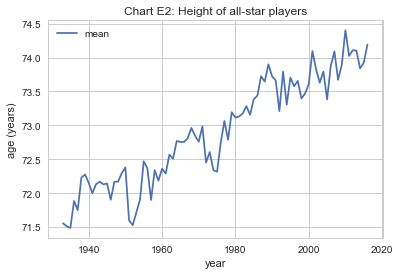

In [40]:
plot_groupby_mean(allstar_df, 'yearID', 'height', 
                  'Chart E2: Height of all-star players', 'year',
                  'age (years)')

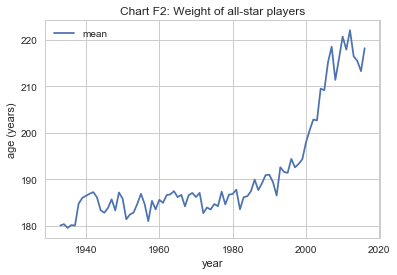

In [41]:
plot_groupby_mean(allstar_df, 'yearID', 'weight', 
                  'Chart F2: Weight of all-star players', 'year',
                  'age (years)')

I thought it would be interesting to compare the average age, heights and weights of all-star players to all of the mlb players.  To compute the data for all players, I used Appearances.csv, which has games played data for all players in Major League Baseball.  Similarly as the all-star data, I then merged this to master_df, which has data on players' attributes.

In [42]:
appearances_df = pd.read_csv('Appearances.csv')
appearances_df.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,NaN,1,1,0,0,...,0,0,1,0,0,0,0,NaN,NaN,NaN
1,1871,RC1,NaN,addybo01,25,NaN,25,25,0,0,...,22,0,3,0,0,0,0,NaN,NaN,NaN
2,1871,CL1,NaN,allisar01,29,NaN,29,29,0,0,...,2,0,0,0,29,0,29,NaN,NaN,NaN
3,1871,WS3,NaN,allisdo01,27,NaN,27,27,0,27,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1871,RC1,NaN,ansonca01,25,NaN,25,25,0,5,...,2,20,0,1,0,0,1,NaN,NaN,NaN


In [43]:
allplayer_df = appearances_df[appearances_df.yearID >= 1933].merge(master_df, on=['playerID'], how='inner')
allplayer_df.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,1933,CIN,NL,adamssp01,137,134.0,137,137,0,0,...,Adams,Earl John,151.0,65.0,R,R,1922-09-18,1934-09-30,adams101,adamssp01
1,1933,SLN,NL,adamssp01,8,8.0,8,8,0,0,...,Adams,Earl John,151.0,65.0,R,R,1922-09-18,1934-09-30,adams101,adamssp01
2,1934,CIN,NL,adamssp01,87,61.0,87,67,0,0,...,Adams,Earl John,151.0,65.0,R,R,1922-09-18,1934-09-30,adams101,adamssp01
3,1933,BOS,AL,alexada01,94,75.0,94,78,0,0,...,Alexander,David Dale,210.0,75.0,R,R,1929-04-16,1933-09-23,alexd101,alexada01
4,1933,SLN,NL,allenet01,91,58.0,91,67,0,0,...,Allen,Ethan Nathan,180.0,73.0,R,R,1926-06-13,1938-06-18,allee101,allenet01


Since the baseball season lasts from March/April to October, I decided to use the all-star game date as the anchor date to compute the player's age.  This would make the all-stars' and all players' data consistent as well.

In [44]:
allplayer_df = allplayer_df.merge(asgDates_df, left_on=['yearID'], right_on=['asgYear'], how='inner')

In [45]:
allplayer_df.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,height,bats,throws,debut,finalGame,retroID,bbrefID,asgYear,asgMth,asgDay
0,1933,CIN,NL,adamssp01,137,134.0,137,137,0,0,...,65.0,R,R,1922-09-18,1934-09-30,adams101,adamssp01,1933,7,6
1,1933,SLN,NL,adamssp01,8,8.0,8,8,0,0,...,65.0,R,R,1922-09-18,1934-09-30,adams101,adamssp01,1933,7,6
2,1933,BOS,AL,alexada01,94,75.0,94,78,0,0,...,75.0,R,R,1929-04-16,1933-09-23,alexd101,alexada01,1933,7,6
3,1933,SLN,NL,allenet01,91,58.0,91,67,0,0,...,73.0,R,R,1926-06-13,1938-06-18,allee101,allenet01,1933,7,6
4,1933,NYA,AL,allenjo02,25,24.0,25,25,25,0,...,72.0,R,R,1932-04-19,1944-09-26,allej102,allenjo02,1933,7,6


Checking for missing values (Due to redundancies, I am only showing a couple of checks.)

In [46]:
number_of_NaN(allplayer_df,'birthMonth')

num of rows:  80497
num of values:  80497
num of missing values:  0


0

In [47]:
number_of_NaN(allplayer_df,'birthYear')

num of rows:  80497
num of values:  80497
num of missing values:  0


0

In [48]:
number_of_NaN(allplayer_df,'asgYear')

num of rows:  80497
num of values:  80497
num of missing values:  0


0

In [49]:
print allplayer_df['G_all'].min()

1


Computing ages

In [50]:
allplayer_df.birthYear = allplayer_df.birthYear.astype(int)
allplayer_df.birthMonth = allplayer_df.birthMonth.astype(int)
allplayer_df.birthDay = allplayer_df.birthDay.astype(int)
allplayer_df.yearID = allplayer_df.yearID.astype(int)

In [51]:
allplayer_df['date_birth'] = allplayer_df['birthYear'].astype(str) + '-' + allplayer_df['birthMonth'].astype(str) + '-' + allplayer_df['birthDay'].astype(str)
allplayer_df['date_birth'] = pd.to_datetime(allplayer_df['date_birth'])

In [52]:
allplayer_df['date_as_game'] = allplayer_df['yearID'].astype(str) + '-' + allplayer_df['asgMth'].astype(str) + '-' + allplayer_df['asgDay'].astype(str)
allplayer_df['date_as_game'] = pd.to_datetime(allplayer_df['date_as_game'])

In [53]:
allplayer_df['age'] = (allplayer_df['date_as_game'] - allplayer_df['date_birth']) / np.timedelta64(1,'Y')

In [54]:
allplayer_df.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,debut,finalGame,retroID,bbrefID,asgYear,asgMth,asgDay,date_birth,date_as_game,age
0,1933,CIN,NL,adamssp01,137,134.0,137,137,0,0,...,1922-09-18,1934-09-30,adams101,adamssp01,1933,7,6,1894-08-26 00:00:00,1933-07-06,38.859114
1,1933,SLN,NL,adamssp01,8,8.0,8,8,0,0,...,1922-09-18,1934-09-30,adams101,adamssp01,1933,7,6,1894-08-26 00:00:00,1933-07-06,38.859114
2,1933,BOS,AL,alexada01,94,75.0,94,78,0,0,...,1929-04-16,1933-09-23,alexd101,alexada01,1933,7,6,1903-04-26,1933-07-06,30.196376
3,1933,SLN,NL,allenet01,91,58.0,91,67,0,0,...,1926-06-13,1938-06-18,allee101,allenet01,1933,7,6,1904-01-01,1933-07-06,29.511900
4,1933,NYA,AL,allenjo02,25,24.0,25,25,25,0,...,1932-04-19,1944-09-26,allej102,allenjo02,1933,7,6,1904-09-30,1933-07-06,28.764451


In [55]:
def plot_two_means_groupby(datalist1, grp1, colname1, name1,
                           datalist2, grp2, colname2, name2,
                           ptitle, pxlabel, pylabel):
    # plot two mean line charts
    # datalist1 & datalist2 have data
    # grp1 & grp2 is the fields to groupby
    # colname1 & colname2 are the field to chart
    # name1 and name2 are the legend names
    # ptitle is the plot title
    # pxlabel is the plot xlabel
    # pylabel is the plot ylabel
    
    datalist1_group = datalist1.groupby(grp1)
    datalist2_group = datalist2.groupby(grp2)

    data_mean1 = datalist1_group[colname1].mean()
    data_mean2 = datalist2_group[colname2].mean()
    
    plt.plot(data_mean1, label=name1)
    plt.plot(data_mean2, label=name2)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)
    
    plt.legend(loc='upper left')
    
    return None

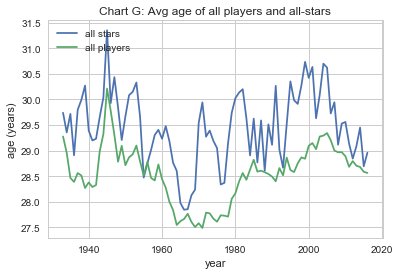

In [56]:
plot_two_means_groupby(allstar_df, 'yearID', 'age', 'all stars',
                       allplayer_df, 'yearID', 'age', 'all players',
                       'Chart G: Avg age of all players and all-stars', 
                       'year', 'age (years)')

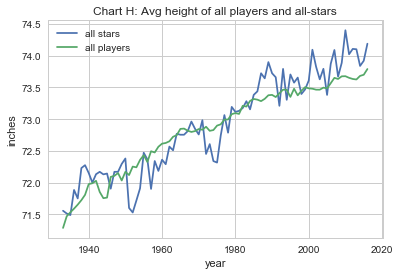

In [57]:
plot_two_means_groupby(allstar_df, 'yearID', 'height', 'all stars',
                       allplayer_df, 'yearID', 'height', 'all players',
                       'Chart H: Avg height of all players and all-stars', 
                       'year', 'inches')

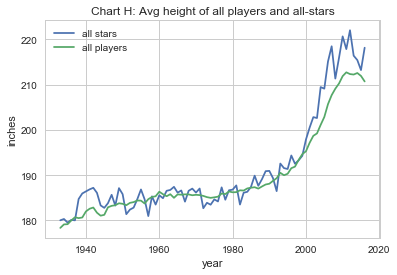

In [58]:
plot_two_means_groupby(allstar_df, 'yearID', 'weight', 'all stars',
                       allplayer_df, 'yearID', 'weight', 'all players',
                       'Chart H: Avg height of all players and all-stars', 
                       'year', 'inches')

Average age for all-stars have been consistenly higher than for all players by 0 to 1.5 years (chart G).  Since 1980, average all-star players were 29.6 years, or 0.9 years older than all players with the average age of 28.8 years [the 0.1 year difference in the subtraction value is due to a rounding error].  A possible explanation for this may be that young players need time to adjust to the competition and are rather unknwon, so they are often overlooked versus veterans with more experiences and popularities. 

Average heights have been also higher for all-star players since 2000.  All-stars have averaged 73.9 inches compared to 73.6 inches for all players during this period.  A possible explanation may be taller players may have better physical tools.

More recently, weights for all-stars have also been higher.  Since 2000, average weights for all-stars were 212 pounds, or 6 pounds higher than the average for the league.

Next, I will look at the distribution of all-stars' and all players' age, height and weight.  Since height and weight has drifted over the year, we will focus on only the 2016 season for the distribution.

In [59]:
as_2016 = pd.DataFrame(allstar_df[allstar_df.yearID == 2016], columns=['yearID','age','height','weight']).assign(ptype='All-star')
ap_2016 = pd.DataFrame(allplayer_df[allplayer_df.yearID == 2016], columns=['yearID','age','height','weight']).assign(ptype='All players')

full_2016 = pd.concat([as_2016, ap_2016])

In [60]:
def boxplot_players(xtype,ytype,df, pxlabel, pylabel, ptitle):

    sns.boxplot(x=xtype, y=ytype, data=df)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)
    plt.title(ptitle)
    
    return None

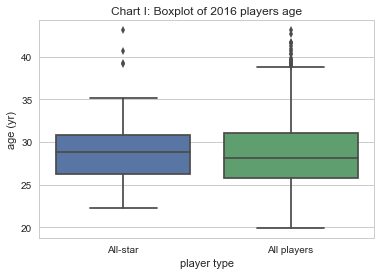

In [61]:
boxplot_players('ptype','age',full_2016,'player type','age (yr)',
                'Chart I: Boxplot of 2016 players age')

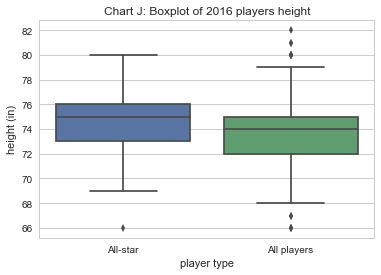

In [62]:
boxplot_players('ptype','height',full_2016,'player type','height (in)',
                'Chart J: Boxplot of 2016 players height')

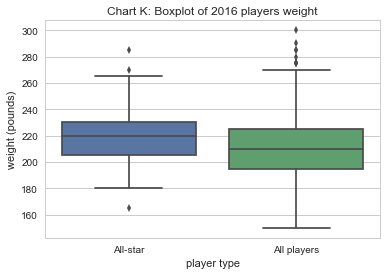

In [63]:
boxplot_players('ptype','weight',full_2016,'player type','weight (pounds)',
                'Chart K: Boxplot of 2016 players weight')

Interquartile range of all-star players' age is more compressed than that of the  league (Chart I).  This may be because all-star players tend to be at the prime of their careers, i.e. between 26 and 31 years of age.
Boxplot of players' height seem to show similar ranges and interquartile ranges, except that heights of all-star players are slightly taller (Chart J).
All-star players' weight were in a smaller range and interquartile range compared to all players (Chart K).


I also drew relative frequency histograms of the three variables.

In [64]:
def hist_rel_players(ytype,df1, df2, label1, label2, bin, pxlabel, pylabel, ptitle):
    
    plt.hist(df1[ytype], alpha=0.7, edgecolor='black', bins=bin,normed=True, label=label1)
    plt.hist(df2[ytype], alpha=0.5, edgecolor='black', bins=bin,normed=True, label=label2)

    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)
    plt.title(ptitle)
    plt.legend(loc='upper left')

    return None

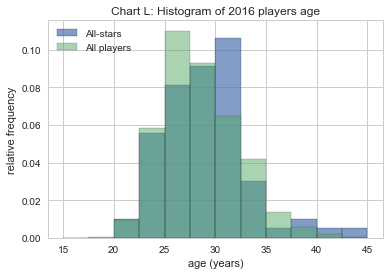

In [65]:
hist_rel_players('age',as_2016, ap_2016, 'All-stars', 'All players', numpy.linspace(15,45,13),
             'age (years)','relative frequency',
                'Chart L: Histogram of 2016 players age')

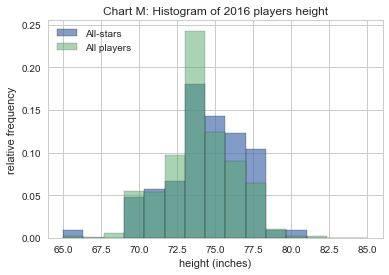

In [66]:
hist_rel_players('height',as_2016, ap_2016, 'All-stars', 'All players', numpy.linspace(65,85,16),
                 'height (inches)','relative frequency',
                 'Chart M: Histogram of 2016 players height')

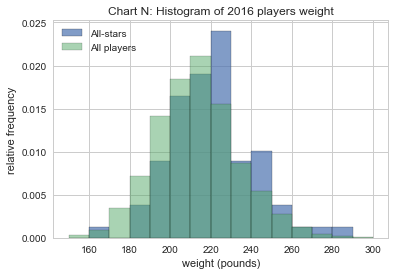

In [67]:
hist_rel_players('weight',as_2016, ap_2016, 'All-stars', 'All players', numpy.linspace(150,300,16),
                 'weight (pounds)','relative frequency',
                 'Chart N: Histogram of 2016 players weight')

The peak of the all-star players age histogram is betwee 30.0 and 32.5 years, while for all-players, it is between 25.0 and 27.5 years (Chart L).  Besides the peak of 30.0-32.5 year range, relative frequencies for all age range below 37.5 years for all-star players are lower than the all players.  However, I found it interesting that relative frequencies for all-star players greater than 37.5 years were higher than all players.  An explanation may be that retiring veterans are being selected to all-star games for their final season.

Chart M and Chart N show that relative frequencies tend to be higher in higher bucket for all-stars.

**CONCLUSION FOR QUESTION 2**

Since the inception of the all-star game in 1933, average age of all-star players has been fairly consistent at 29 years.  On average, all-star players tend to be 0.5 years older than all players in the league.  

On the other hand, average weight and average height has increased over the years to 74 inches and average weight has jumped to 218 pounds in 2016.  Average age of all-star players were almost 1 year older than average age of all players.  Since 2000, average height of all-stars were 0.3 inches taller and average weight were 6 pounds heavier than all players.  As mentioned above, one limitation of the height and weight data is that there is only one value for a player.  Weight and height of most, if not all, players will fluctuate during the course of their career.  The analysis would have benefitted if the players weight and height were provided for every season.